In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import os
import pathlib

In [3]:
fig_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/rf-baseline/figs"

pathlib.Path(fig_dir).mkdir(exist_ok=True, parents=True)

In [4]:
filename = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/rf-baseline/runs.csv"

In [5]:
df = pd.read_csv(filename)

In [6]:
df.columns

Index(['Run ID', 'Name', 'Source Type', 'Source Name', 'User', 'Status',
       'fold_num', 'message', 'model', 'train_size', 'accuracy_test_score',
       'accuracy_test_score_time', 'accuracy_train_score',
       'accuracy_train_score_time', 'completed', 'csv_read_time',
       'data_split_time', 'fold_timer', 'precision_weighted_test_score',
       'precision_weighted_test_score_time', 'precision_weighted_train_score',
       'precision_weighted_train_score_time', 'recall_weighted_test_score',
       'recall_weighted_test_score_time', 'recall_weighted_train_score',
       'recall_weighted_train_score_time', 'run_time', 'scoring_time',
       'sparsify_time', 'top_5_test_score', 'top_5_test_score_time',
       'top_5_train_score', 'top_5_train_score_time', 'train_sample_size',
       'train_time'],
      dtype='object')

In [7]:
['model', 'accuracy_test_score', 'precision_weighted_test_score', 'recall_weighted_test_score', 'top_5_test_score']

['model',
 'accuracy_test_score',
 'precision_weighted_test_score',
 'recall_weighted_test_score',
 'top_5_test_score']

In [8]:
df[['fold_num', 'train_size']]

,fold_num,train_size
0,5,0.1
1,4,0.1
2,3,0.1
3,2,0.1
4,1,0.1
5,5,0.2
6,4,0.2
7,3,0.2
8,2,0.2
9,1,0.2


In [9]:
grp = df.groupby('train_size')
avg = grp.mean()
std = grp.std()

In [10]:
train_size = avg.index

In [11]:
train_acc_score = avg.accuracy_train_score
test_acc_score = avg.accuracy_test_score

train_acc_score_std = std.accuracy_train_score
test_acc_score_std = std.accuracy_test_score

In [12]:
train_precision_score = avg.precision_weighted_train_score
test_precision_score = avg.precision_weighted_test_score

train_precision_score_std = std.precision_weighted_train_score
test_precision_score_std = std.precision_weighted_test_score

In [13]:
train_recall_score = avg.recall_weighted_train_score
test_recall_score = avg.recall_weighted_test_score

train_recall_score_std = std.recall_weighted_train_score
test_recall_score_std = std.recall_weighted_test_score

In [14]:
train_top_5 = avg.top_5_train_score
test_top_5 = avg.top_5_test_score

train_top_5_std = std.top_5_train_score
test_top_5_std = std.top_5_test_score

In [15]:
sample_size = avg.train_sample_size

In [16]:
xticks = (avg.train_sample_size)/10**5

In [17]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

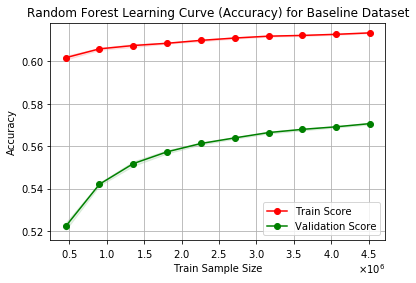

In [18]:
# accuracy learning curve
acc_fig, acc_ax = plt.subplots()

acc_ax.grid()
acc_ax.fill_between(
        sample_size, train_acc_score - train_acc_score_std, 
        train_acc_score + train_acc_score_std, alpha=0.1, color="r"
    )
acc_ax.fill_between(
        sample_size, test_acc_score - test_acc_score_std,
        test_acc_score + test_acc_score_std, alpha=0.1, color="g"
    )
acc_ax.plot(sample_size, train_acc_score,'o-', color="r", label="Train Score")
acc_ax.plot(sample_size, test_acc_score,'o-', color="g", label="Validation Score")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Accuracy')
acc_ax.set_xlabel('Train Sample Size')
acc_ax.xaxis.set_major_formatter(formatter) 
acc_ax.set_title('Random Forest Learning Curve (Accuracy) for Baseline Dataset')
acc_fig.savefig(os.path.join(fig_dir, "learning_acc_rf_baseline.pdf"))

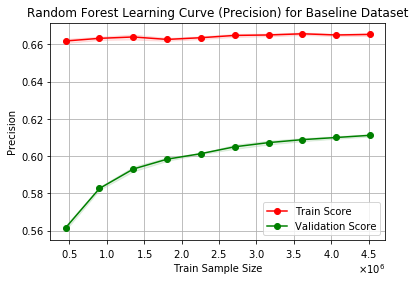

In [19]:
acc_fig, acc_ax = plt.subplots()

acc_ax.grid()
acc_ax.fill_between(
        sample_size, train_precision_score - train_precision_score_std, 
        train_precision_score + train_precision_score_std, alpha=0.1, color="r"
    )
acc_ax.fill_between(
        sample_size, test_precision_score - test_precision_score_std,
        test_precision_score + test_precision_score_std, alpha=0.1, color="g"
    )
acc_ax.plot(sample_size, train_precision_score,'o-', color="r", label="Train Score")
acc_ax.plot(sample_size, test_precision_score,'o-', color="g", label="Validation Score")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Precision')
acc_ax.set_xlabel('Train Sample Size')
acc_ax.xaxis.set_major_formatter(formatter) 
acc_ax.set_title('Random Forest Learning Curve (Precision) for Baseline Dataset')
acc_fig.savefig(os.path.join(fig_dir, "learning_prec_rf_baseline.pdf"))

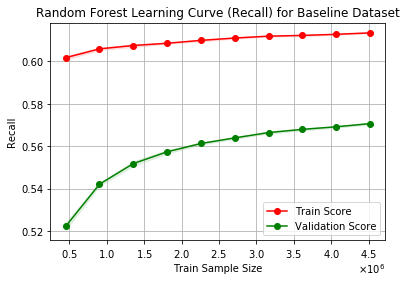

In [20]:
acc_fig, acc_ax = plt.subplots()

acc_ax.grid()
acc_ax.fill_between(
        sample_size, train_recall_score - train_recall_score_std, 
        train_recall_score + train_recall_score_std, alpha=0.1, color="r"
    )
acc_ax.fill_between(
        sample_size, test_recall_score - test_recall_score_std,
        test_recall_score + test_recall_score_std, alpha=0.1, color="g"
    )
acc_ax.plot(sample_size, train_recall_score,'o-', color="r", label="Train Score")
acc_ax.plot(sample_size, test_recall_score,'o-', color="g", label="Validation Score")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Recall')
acc_ax.set_xlabel('Train Sample Size')
acc_ax.xaxis.set_major_formatter(formatter) 
acc_ax.set_title('Random Forest Learning Curve (Recall) for Baseline Dataset')
acc_fig.savefig(os.path.join(fig_dir, "learning_recall_rf_baseline.pdf"))

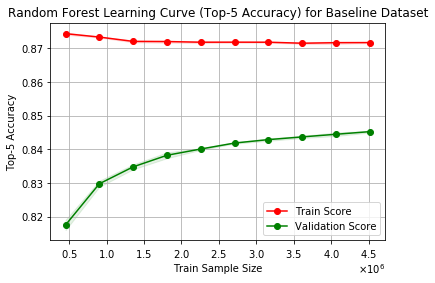

In [21]:
acc_fig, acc_ax = plt.subplots()

acc_ax.grid()
acc_ax.fill_between(
        sample_size, train_top_5 - train_top_5_std, 
        train_top_5 + train_top_5_std, alpha=0.1, color="r"
    )
acc_ax.fill_between(
        sample_size, test_top_5 - test_top_5_std,
        test_top_5 + test_top_5_std, alpha=0.1, color="g"
    )
acc_ax.plot(sample_size, train_top_5,'o-', color="r", label="Train Score")
acc_ax.plot(sample_size, test_top_5,'o-', color="g", label="Validation Score")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Top-5 Accuracy')
acc_ax.set_xlabel('Train Sample Size')
acc_ax.xaxis.set_major_formatter(formatter) 
acc_ax.set_title('Random Forest Learning Curve (Top-5 Accuracy) for Baseline Dataset')
acc_fig.savefig(os.path.join(fig_dir, "learning_top5_rf_baseline.pdf"))

In [22]:
relevant_scores = [
    'accuracy_train_score', 
    'accuracy_test_score', 
    'precision_weighted_train_score', 
    'precision_weighted_test_score',
    'top_5_test_score',
    'top_5_train_score'
]

In [23]:
avg[relevant_scores].loc[1]

accuracy_train_score              0.613501
accuracy_test_score               0.570685
precision_weighted_train_score    0.665396
precision_weighted_test_score     0.611229
top_5_test_score                  0.845260
top_5_train_score                 0.871699
Name: 1.0, dtype: float64

In [24]:
std[relevant_scores].loc[1]

accuracy_train_score              0.000198
accuracy_test_score               0.000496
precision_weighted_train_score    0.000807
precision_weighted_test_score     0.000664
top_5_test_score                  0.000264
top_5_train_score                 0.000170
Name: 1.0, dtype: float64